In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('cleaned_dataset.csv')

In [4]:
df.drop(columns=['service_failure_count'], inplace=True)

In [5]:
X = df.drop(columns=['churn'])
y = df['churn']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [9]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
acc_gap = train_acc - test_acc
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

In [10]:
data = {
    "Model": ["Decision Tree"],
    "Train Accuracy (%)": [round(train_acc * 100, 2)],
    "Test Accuracy (%)": [round(test_acc * 100, 2)],
    "Accuracy Gap (%)": [round(acc_gap * 100, 2)],
    "Precision (%)": [round(precision * 100, 2)],
    "Recall (%)": [round(recall * 100, 2)],
    "F1 Score (%)": [round(f1 * 100, 2)],
    "ROC AUC": [round(roc_auc, 6)]
}

In [11]:
df = pd.DataFrame(data)

df

,Model,Train Accuracy (%),Test Accuracy (%),Accuracy Gap (%),Precision (%),Recall (%),F1 Score (%),ROC AUC
0,Decision Tree,99.96,91.08,8.88,92.23,91.71,91.97,0.909957


In [12]:
df.to_excel("decision_tree_metrics.xlsx", index=False)

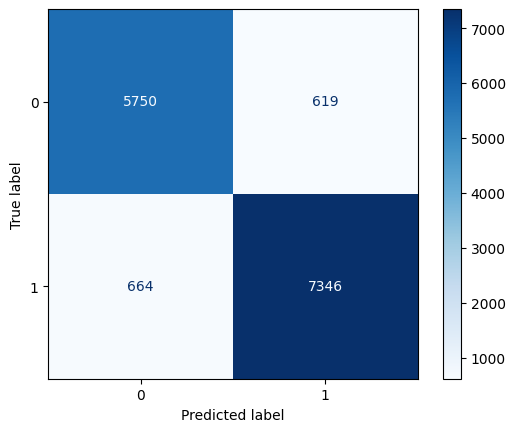

In [13]:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [16]:
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
acc_gap_rf = train_acc_rf - test_acc_rf
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

In [17]:
rf_data = {
    "Model": ["Random Forest"],
    "Train Accuracy (%)": [round(train_acc_rf * 100, 2)],
    "Test Accuracy (%)": [round(test_acc_rf * 100, 2)],
    "Accuracy Gap (%)": [round(acc_gap_rf * 100, 2)],
    "Precision (%)": [round(precision_rf * 100, 2)],
    "Recall (%)": [round(recall_rf * 100, 2)],
    "F1 Score (%)": [round(f1_rf * 100, 2)],
    "ROC AUC": [round(roc_auc_rf, 6)]
}

In [18]:
df_rf = pd.DataFrame(rf_data)

df_rf

,Model,Train Accuracy (%),Test Accuracy (%),Accuracy Gap (%),Precision (%),Recall (%),F1 Score (%),ROC AUC
0,Random Forest,99.95,94.2,5.75,95.95,93.53,94.73,0.942858


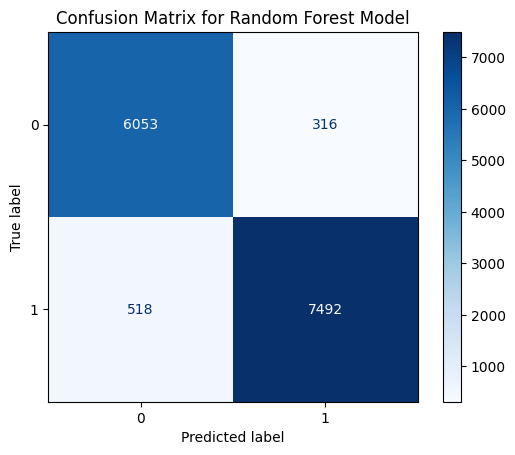

In [19]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [20]:
df.to_excel("random_forest_metrics.xlsx", index=False)